In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

In [53]:
data = pd.read_csv("spam.csv", encoding="latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [54]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [55]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1, inplace=True)
data.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
data.groupby("Target").describe()

Text                                                               
       count unique                                                top freq
Target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

C:\Users\PARAG JADHAV\AppData\Local\Temp\ipykernel_2832\1947454109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg=sns.countplot(x=data["Target"], palette=cols)


Text(0, 0.5, 'Count')

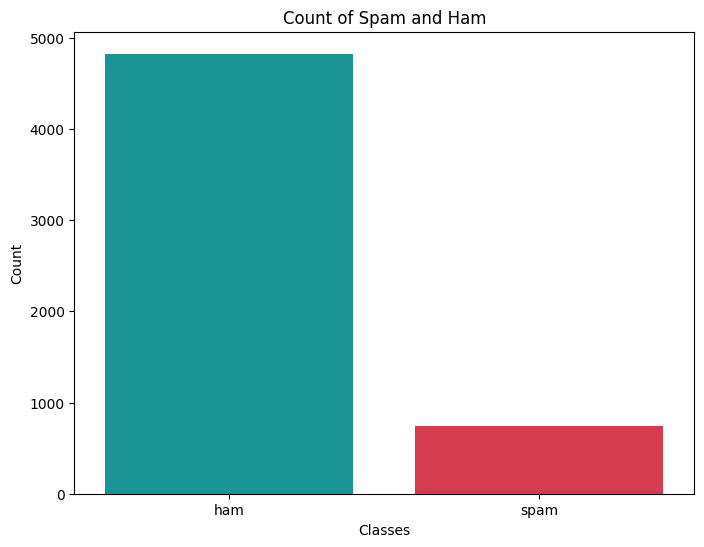

In [57]:
cols=["#05A8AA","#EF233C"]
plt.figure(figsize=(8,6))
fg=sns.countplot(x=data["Target"], palette=cols)
fg.set_title("Count of Spam and Ham")
fg.set_xlabel("Classes")
fg.set_ylabel("Count")

In [58]:
data["Text_Length"]=data["Text"].apply(len)
data.head()

,Target,Text,Text_Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# 1. Data Cleaning

## 1.1 Extract only the alphabetic characters(to remove punctuation and numbers)

In [59]:
print(data["Text"][:10])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: Text, dtype: object


## 1.2 Convert all the characters into lowercase

In [60]:
import re  # Import re at the beginning

def clean(text):
  sms= re.sub('[^a-zA-Z]', " ", text)
  sms=sms.lower()
  
  #remove extra whitespaces
  sms= sms.split()
  sms= ' '.join(sms)
  return sms

data["Cleaned_text"]=data["Text"].apply(clean)


In [61]:
print(data["Cleaned_text"][:10])

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
5    freemsg hey there darling it s been week s now...
6    even my brother is not like to speak with me t...
7    as per your request melle melle oru minnaminun...
8    winner as a valued network customer you have b...
9    had your mobile months or more u r entitled to...
Name: Cleaned_text, dtype: object


# 2. Tokenization

Tokenization is breaking complex data into smaller units called tokens. It can be done by splitting paragraphs into sentences and sentences into words.

In [62]:
import nltk
nltk.download('punkt')

data["Tokenized_text"]=data.apply(lambda row: nltk.word_tokenize(row["Cleaned_text"]), axis=1)
print(data["Tokenized_text"][:10])

[nltk_data] Downloading package punkt to C:\Users\PARAG
[nltk_data]     JADHAV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
5    [freemsg, hey, there, darling, it, s, been, we...
6    [even, my, brother, is, not, like, to, speak, ...
7    [as, per, your, request, melle, melle, oru, mi...
8    [winner, as, a, valued, network, customer, you...
9    [had, your, mobile, months, or, more, u, r, en...
Name: Tokenized_text, dtype: object


# 3. Removing Stop Words

Stopwords are frequently occurring words(such as few, is, an, etc). These words hold meaning in sentence structure, but do not contribute much to language processing in NLP.

In [63]:
nltk.download('stopwords')
def remove_stopwords(text):
    stop_words=set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data["Nostopword_text"] = data["Tokenized_text"].apply(remove_stopwords)

print(data["Nostopword_text"][:10])

[nltk_data] Downloading package stopwords to C:\Users\PARAG
[nltk_data]     JADHAV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4       [nah, think, goes, usf, lives, around, though]
5    [freemsg, hey, darling, week, word, back, like...
6    [even, brother, like, speak, treat, like, aids...
7    [per, request, melle, melle, oru, minnaminungi...
8    [winner, valued, network, customer, selected, ...
9    [mobile, months, u, r, entitled, update, lates...
Name: Nostopword_text, dtype: object


# 4. Stemming

The process of reducing words to their root or base form, typically by removing suffixes or prefixes, with the aim of capturing the core meaning of words.

In [64]:
stemmer = PorterStemmer()
def stem_word(text):
    stems = [stemmer.stem(word) for word in text]
    return stems
data["Stemmed_text"] = data["Nostopword_text"].apply(stem_word)

print(data["Stemmed_text"][:10])

0    [go, jurong, point, crazi, avail, bugi, n, gre...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entri, wkli, comp, win, fa, cup, final,...
3        [u, dun, say, earli, hor, u, c, alreadi, say]
4         [nah, think, goe, usf, live, around, though]
5    [freemsg, hey, darl, week, word, back, like, f...
6    [even, brother, like, speak, treat, like, aid,...
7    [per, request, mell, mell, oru, minnaminungint...
8    [winner, valu, network, custom, select, receiv...
9    [mobil, month, u, r, entitl, updat, latest, co...
Name: Stemmed_text, dtype: object


# 5. Lemmatization using TF-IDF

TF-IDF in NLP stands for Term Frequency – Inverse document frequency. In NLP cleaned data needs to be converted into a numerical format where each word is represented by a matrix. This is also known as word embedding or Word vectorization.

Steps in the Vectorizing:

Creating a corpus of lemmatized text
Converting the corpus in vector form
Label Encoding the classes in Target

In [65]:
corpus= []
for i in data["Stemmed_text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
    
corpus[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [66]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
X.dtype

dtype('float64')

In [67]:
label_encoder = LabelEncoder()
data["Target"] = label_encoder.fit_transform(data["Target"])

In [68]:
data["Nostopword_text"]

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
                              ...                        
5567    [nd, time, tried, contact, u, u, pound, prize,...
5568                      [b, going, esplanade, fr, home]
5569                            [pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: Nostopword_text, Length: 5572, dtype: object